In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N=10000

In [4]:
def running_mean(X,N,N1):
    "returns the mean up to the i-th point"
    Y=np.cumsum(X,axis=0)
    o=np.ones(N)
    o2=np.cumsum(o).reshape(-1,1)
    return(Y/o2)

# Gaussian

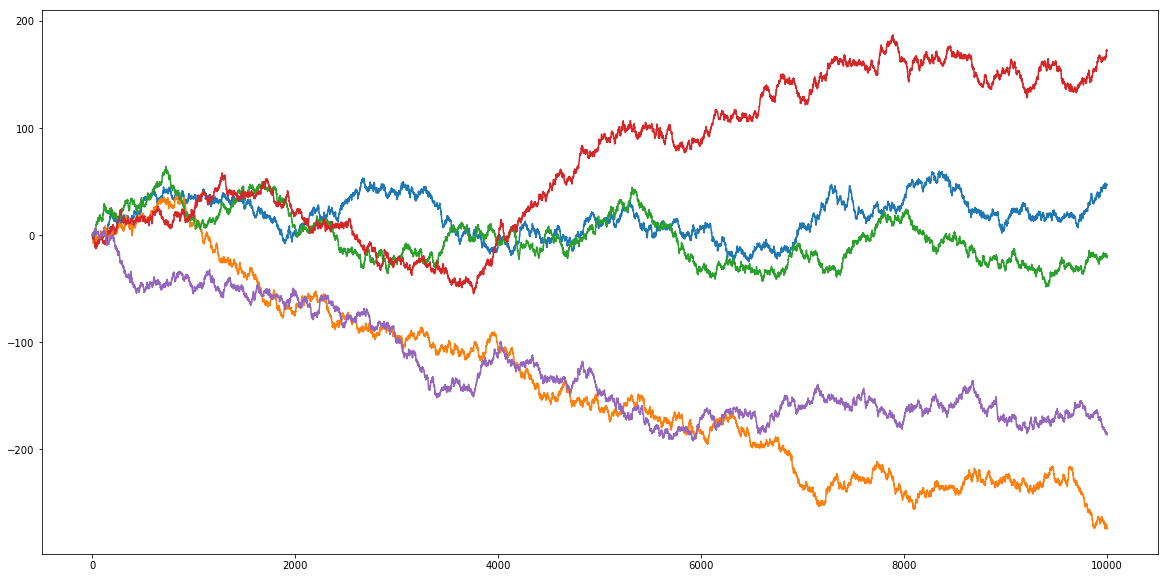

In [5]:
N1=5
X1=np.random.normal(0,1,N*N1)
X1=X1.reshape(N,N1)
    
plt.figure(figsize=(20,10))
S1=np.cumsum(X1,axis=0)
plt.plot(S1);

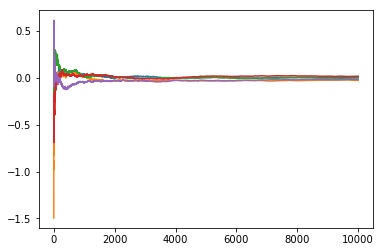

In [6]:
#this is the mean at each step
plt.plot(running_mean(X1,N,N1));

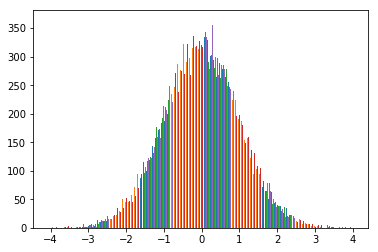

In [7]:
plt.hist(X1,bins=100);

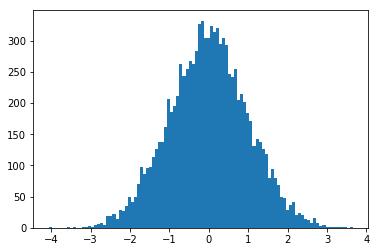

In [8]:
#I sum M1 realizations, and do this M2 times.
# I study how the M2 sums distribute

M1=100
M2=10000
std=10
A1=np.random.normal(0,std,M1*M2)
A1=A1.reshape(M1,M2)
A1_sum=A1.sum(axis=0)/np.sqrt(M1)/std
plt.hist(A1_sum,bins=100);

# Cauchy

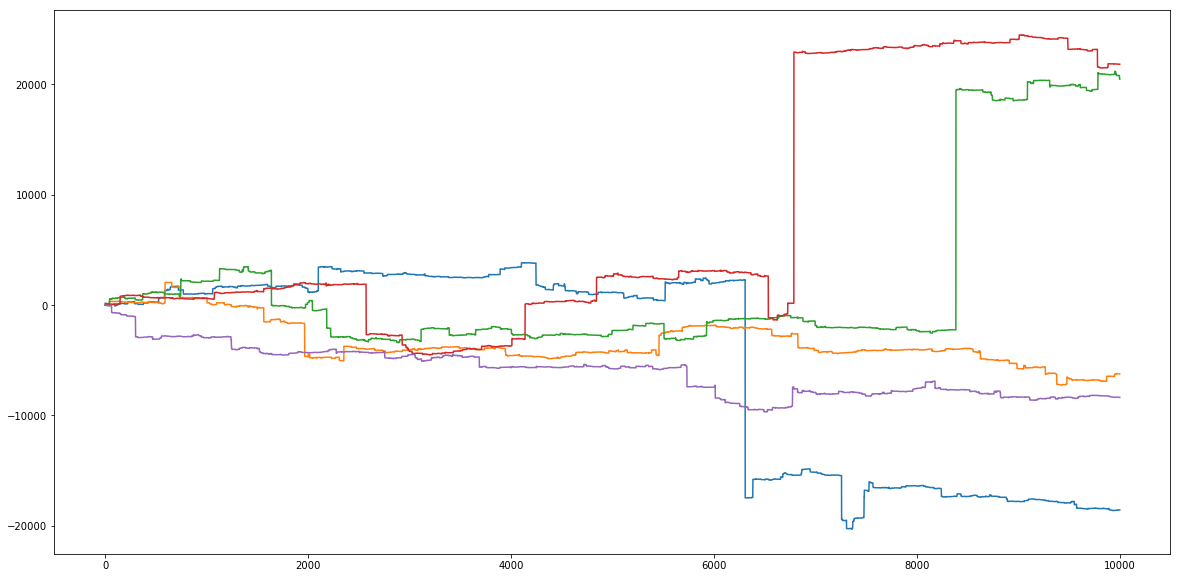

In [9]:
X2=np.random.standard_cauchy(N*N1)
X2=X2.reshape(N,N1)
S2=np.cumsum(X2,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S2);

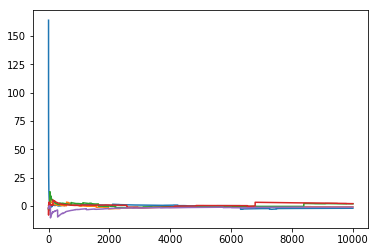

In [10]:
#pdf of the mean should not decay nor diverge; it is always of order 1
plt.plot(running_mean(X2,N,N1));

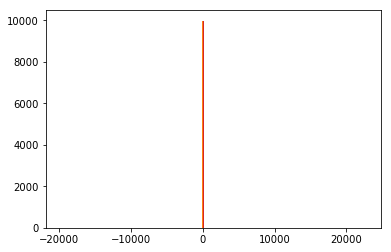

In [11]:
plt.hist(X2,bins=100);

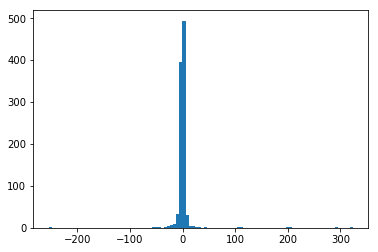

In [12]:
M1=100
M2=1000
A2=np.random.standard_cauchy(M1*M2)
A2=A2.reshape(M1,M2)
A2_sum=A2.sum(axis=0)/(M1)  #should still be cauchy (pdf of the sum)
plt.hist(A2_sum,bins=100);

# Uniform

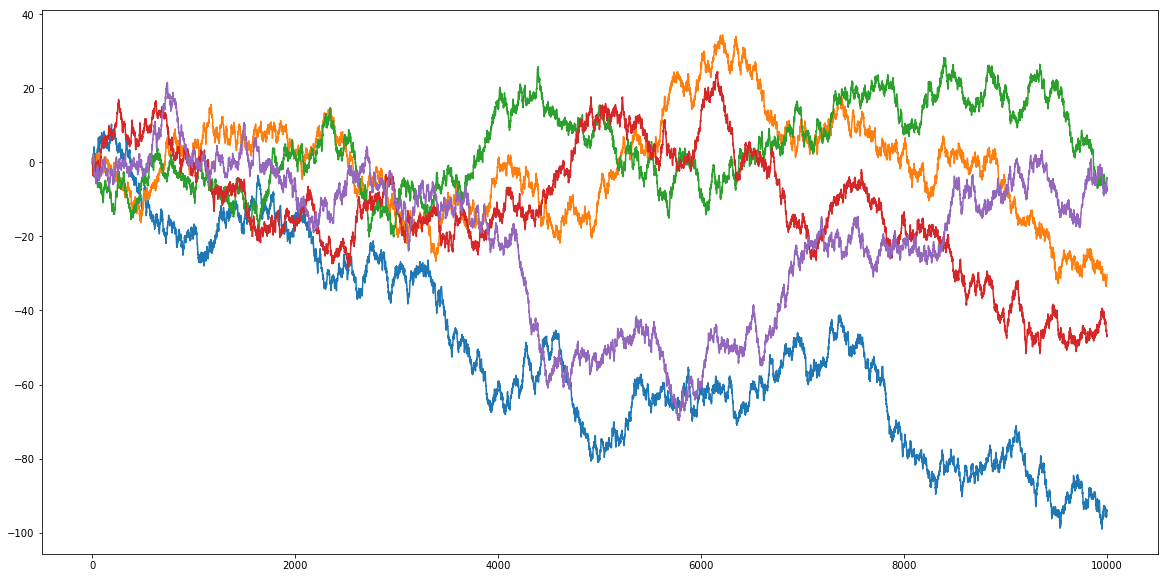

In [13]:
X3=np.random.uniform(-1,1,N*N1)
X3=X3.reshape(N,N1)
S3=np.cumsum(X3,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S3);

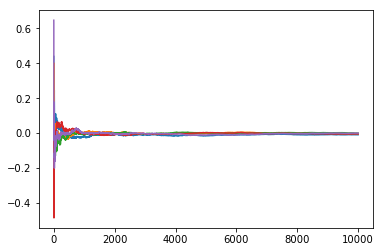

In [14]:
plt.plot(running_mean(X3,N,N1));

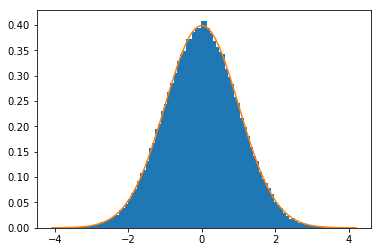

In [15]:
from scipy import stats
M1=100
M2=100000
A3=np.random.uniform(-1,1,M1*M2)
m,v,s,k=stats.uniform.stats(loc=0, scale=2, moments='mvsk')
A3=A3.reshape(M1,M2)
A3_sum=A3.sum(axis=0)/np.sqrt(M1*v)
hist=plt.hist(A3_sum,bins=100,normed=True)


plt.plot(hist[1],stats.norm.pdf(hist[1],0,1),label="gauss")

### corrections from gauss for the uniform

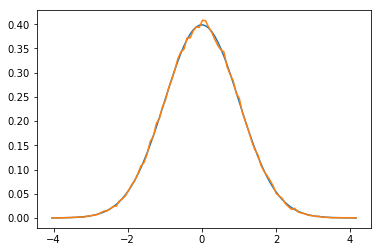

In [16]:
x=np.zeros(len(hist[0]))
for i in range(len(x)):
    x[i]=(hist[1][i]+hist[1][i+1])/2
    

plt.plot(x,stats.norm.pdf(x,0,1),label="gauss")
plt.plot(x,hist[0],label="hist")

In [17]:
h_c=[3,0,-6,0,1]
herm=np.zeros(len(x))
for i in range(5):
    herm+=h_c[i]*x**i
herm*=(k-3)/(24*M1*np.sqrt(v))

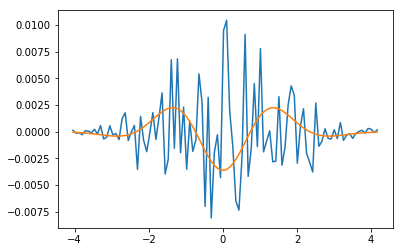

In [18]:
plt.plot(x,hist[0]-stats.norm.pdf(x,0,1),label="difference")
plt.plot(x,herm*stats.norm.pdf(x,0,1))

# Student

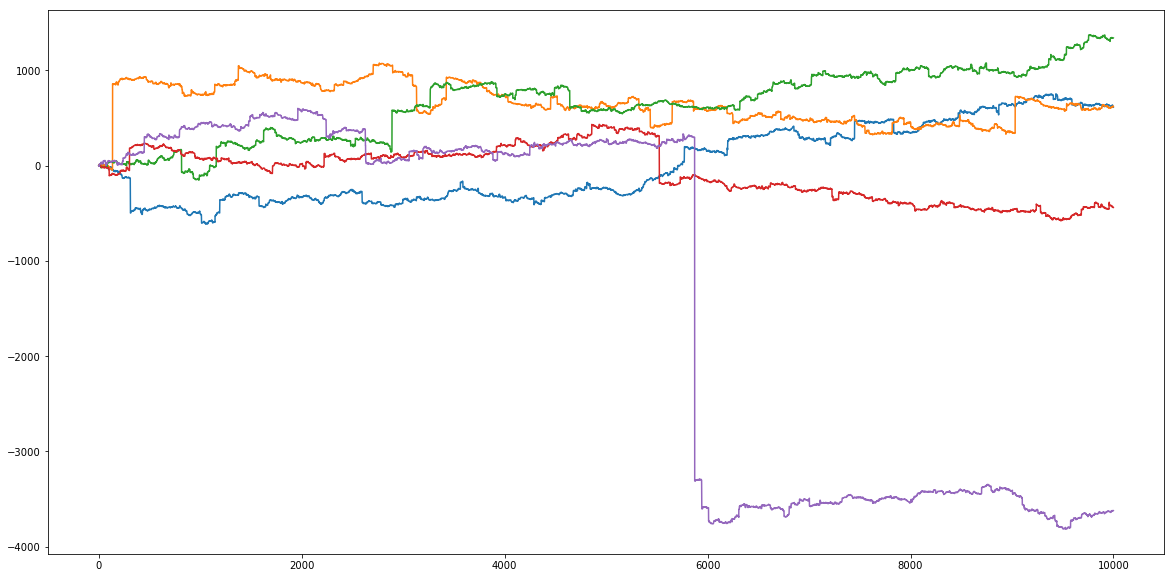

In [19]:
#goes like 1/x^(df+1) for large x (x>>sqrt(df))
#df=1 is the cauchy
#df=inf is the gaussian (wiener)
#df=2 looks like wiener but with jumps

df=1.5
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S4);

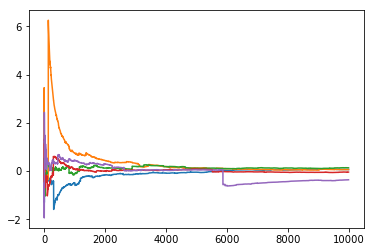

In [20]:
#mean of the series:
#diverges if df<1
#of order 1 if df=1 (cauchy)
# converges for df>1 (law large numbers ok)
plt.plot(running_mean(X4,N,N1));

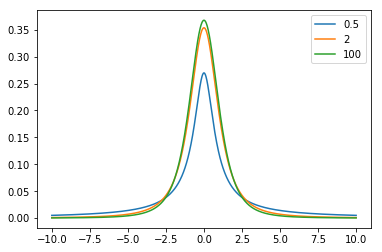

In [21]:
from scipy import stats
x=np.linspace(-10,10,1000)
plt.plot(x,stats.t.pdf(x,0.5),label="0.5")
plt.plot(x,stats.t.pdf(x,2),label="2")
plt.plot(x,stats.t.pdf(x,3),label="100")
plt.legend();

In [22]:
alpha=1
beta=0
#rv = stats.levy_stable(alpha, beta)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

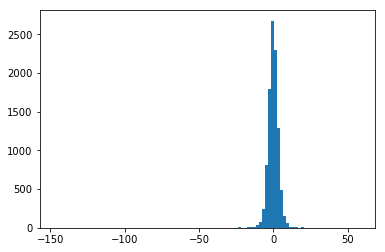

In [23]:
M1=1000
M2=10000
df=2
A4=np.random.standard_t(df,M1*M2)
A4=A4.reshape(M1,M2)
A4_sum=A4.sum(axis=0)/np.sqrt(M1)
plt.hist(A4_sum,bins=100);  

# Compare walks for different time length

### Gauss

In [24]:
N1=5
N2=1000
X1b=np.random.normal(0,1,N2*N1)
X1b=X1b.reshape(N2,N1)
S1b=np.cumsum(X1b,axis=0)
ratio=N/N2
print(ratio)

10.0


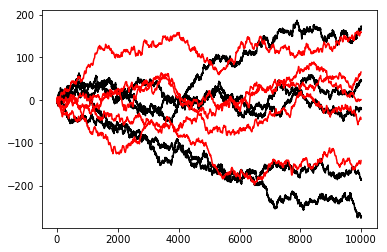

In [25]:
power=1/2

plt.plot(np.arange(0,S1.shape[0]),S1,c='k')
plt.plot(ratio*np.arange(0,S1b.shape[0]),ratio**power*S1b,c='r');


### Cauchy

In [26]:
X2b=np.random.standard_cauchy(N2*N1)
X2b=X2b.reshape(N2,N1)
S2b=np.cumsum(X2b,axis=0)

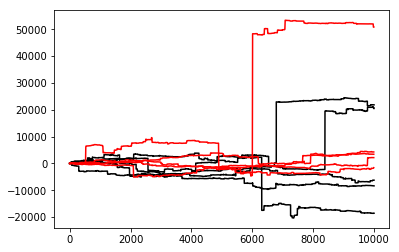

In [27]:
power=1

plt.plot(np.arange(0,S2.shape[0]),S2,c='k')
plt.plot(ratio*np.arange(0,S2b.shape[0]),ratio**power*S2b,c='r');

### Uniform

In [28]:
X3b=np.random.uniform(-1,1,N2*N1)
X3b=X3b.reshape(N2,N1)
S3b=np.cumsum(X3b,axis=0)

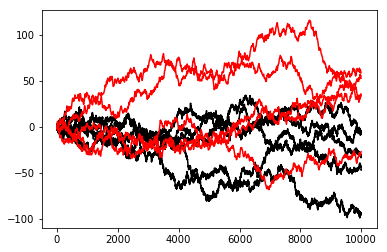

In [29]:
power=1/2

plt.plot(np.arange(0,S3.shape[0]),S3,c='k')
plt.plot(ratio*np.arange(0,S3b.shape[0]),ratio**power*S3b,c='r');

### Student

In [30]:
df=1
N1=10
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)
X4b=np.random.standard_t(df,N2*N1)
X4b=X4b.reshape(N2,N1)
S4b=np.cumsum(X4b,axis=0)

1.0


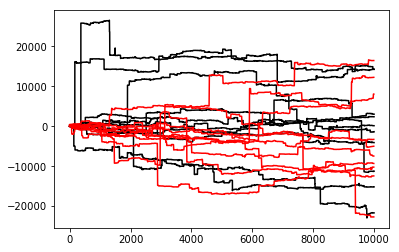

In [31]:
power=1/min(df,2)
print(power)

plt.plot(np.arange(0,S4.shape[0]),S4,c='k')
plt.plot(ratio*np.arange(0,S4b.shape[0]),ratio**power*S4b,c='r');

## Autocorrelation 

In [32]:
SS4=S4.cumsum(axis=1)

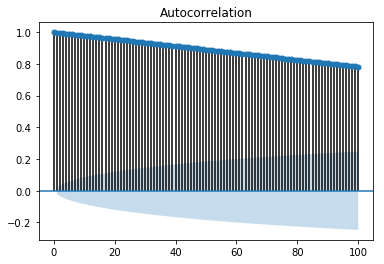

In [33]:
#import statsmodels as sm
#from statsmodels import graphics
import statsmodels.graphics.tsaplots
statsmodels.graphics.tsaplots.plot_acf(S4[:,2],lags=100);

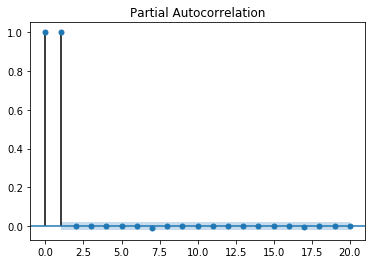

In [34]:
statsmodels.graphics.tsaplots.plot_pacf(S4[:,1],lags=20);

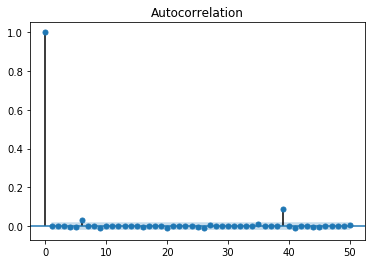

In [35]:
statsmodels.graphics.tsaplots.plot_acf(X4[:,1],lags=50);

In [36]:
import statsmodels.tsa.stattools
acf=statsmodels.tsa.stattools.acf(SS4[:,0],nlags=10)
acf

array([ 1.        ,  0.99843982,  0.99688039,  0.99531796,  0.99375598,
        0.9921937 ,  0.99063083,  0.98906866,  0.98749718,  0.98592478,
        0.9843513 ])

In [37]:
pacf=statsmodels.tsa.stattools.pacf(SS4[:,0],nlags=10)
pacf

array([  1.00000000e+00,   9.98539675e-01,  -5.74853948e-04,
        -1.85761683e-03,  -6.80189705e-04,  -9.35460627e-04,
        -1.03763519e-03,  -5.95945799e-04,  -4.02778309e-03,
        -1.15894285e-03,  -1.20756778e-03])

### MA model

(9997,)


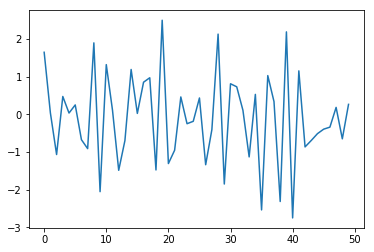

In [38]:
betas=np.array((1,-0.5,0.3,0.2))   #beta[0] is always one
MA1=np.convolve(X1[:,0],betas,mode='valid')
print(MA1.shape)
plt.plot(MA1[:50]);

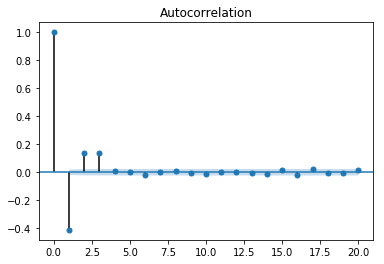

In [39]:
statsmodels.graphics.tsaplots.plot_acf(MA1,lags=20);

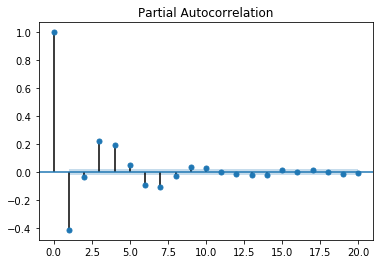

In [40]:
statsmodels.graphics.tsaplots.plot_pacf(MA1,lags=20);

### AR model

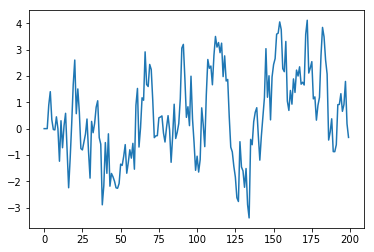

In [41]:
#alfas=np.array((0,1,-0.5))   #exa. 3.1 chapfield
alfas=np.array((0,0.8,0))   #alfa[0] is not used, since the alphas start from 1
Z=X1[:,0]
AR1=np.zeros(len(Z))
for t in range(len(alfas),len(Z)):
    for p in range(1,len(alfas)):
        AR1[t]+=AR1[t-p]*alfas[p]
    AR1[t]+=Z[t]
    
plt.plot(AR1[:200]);

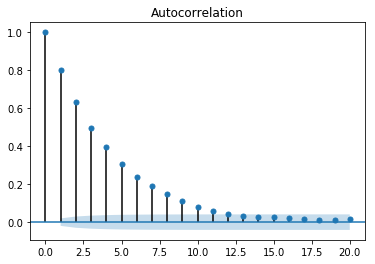

In [42]:
statsmodels.graphics.tsaplots.plot_acf(AR1,lags=20);

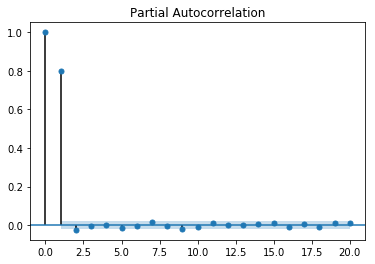

In [43]:
statsmodels.graphics.tsaplots.plot_pacf(AR1,lags=20);

### ARMA

generating a ( 1 , 0 , 1 ) process


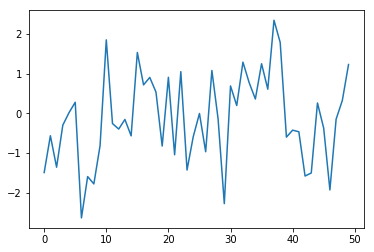

In [44]:
def generate_arma(Z,alfa_p,beta_q,integrate=False):
    """given noise Z and parameters alfa_p, beta_q, generate an ARMA process"""
    p=len(alfa_p)
    q=len(beta_q)
    if(integrate): print("generating a (",p,", 1 ,",q,") process")
    else:          print("generating a (",p,", 0 ,",q,") process")
    import numpy as np
    ARMA=Z.copy()
    for t in range(max(p,q),len(Z)):
        for i in range(p):
            ARMA[t]+=ARMA[t-i-1]*alfa_p[i]
        for j in range(q):
            ARMA[t]+=Z[t-j-1]*beta_q[j]
    if(integrate): return np.cumsum(ARMA)
    else:          return ARMA
  
Z=X1[:,1]
alfa_p=(0.5,)   #AR
beta_q=(-0.3,)  #MA
ARMA1=generate_arma(Z,alfa_p,beta_q)
plt.plot(ARMA1[:50]);

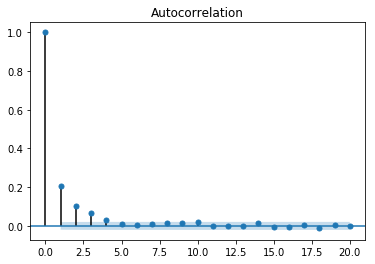

In [45]:
statsmodels.graphics.tsaplots.plot_acf(ARMA1,lags=20);

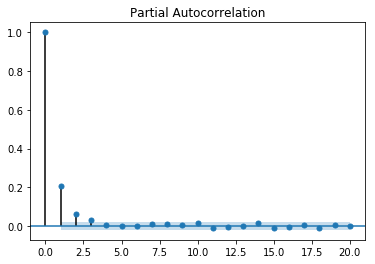

In [46]:
statsmodels.graphics.tsaplots.plot_pacf(ARMA1,lags=20);

### ARIMA
I integrate results from the ARMA model

generating a ( 1 , 1 , 1 ) process


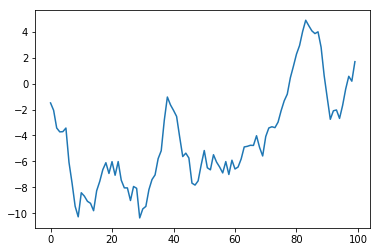

In [47]:
#ARIMA1=np.cumsum(ARMA1)
ARIMA1=generate_arma(Z,alfa_p,beta_q,integrate=True)
plt.plot(ARIMA1[:100]);

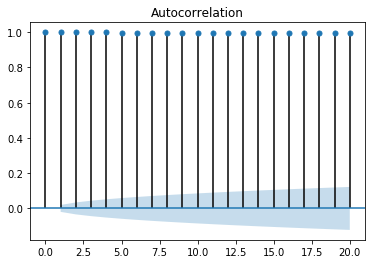

In [48]:
statsmodels.graphics.tsaplots.plot_acf(ARIMA1,lags=20);

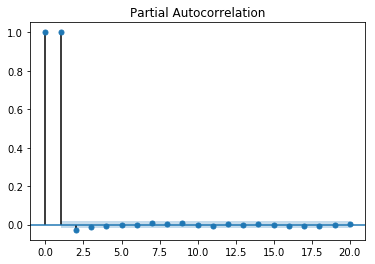

In [49]:
statsmodels.graphics.tsaplots.plot_pacf(ARIMA1,lags=20);

## Estimation of the parameters

(9997,)


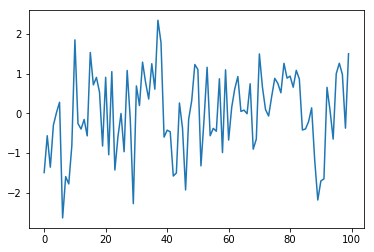

In [50]:
print(MA1.shape)
plt.plot(ARMA1[:100])

In [51]:
import pyramid
from pyramid.arima import ARIMA
import warnings
warnings.filterwarnings('ignore', '.*Conversion*',)

In [52]:
# fitting a stepwise model:
from pyramid.arima import auto_arima

fit = auto_arima(ARMA1, start_p=0, start_q=0, max_p=3, max_q=3,
                          seasonal=False, d=0, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=False)  # set to stepwise

Fit ARIMA: order=(0, 0, 0); AIC=28840.129, BIC=28854.550, Fit time=0.065 seconds
Fit ARIMA: order=(0, 0, 1); AIC=28469.270, BIC=28490.901, Fit time=0.325 seconds
Fit ARIMA: order=(0, 0, 2); AIC=28403.544, BIC=28432.386, Fit time=1.158 seconds
Fit ARIMA: order=(0, 0, 3); AIC=28374.473, BIC=28410.525, Fit time=1.058 seconds
Fit ARIMA: order=(1, 0, 0); AIC=28413.806, BIC=28435.437, Fit time=0.489 seconds
Fit ARIMA: order=(1, 0, 1); AIC=28366.741, BIC=28395.582, Fit time=5.654 seconds
Fit ARIMA: order=(1, 0, 2); AIC=28368.130, BIC=28404.181, Fit time=5.757 seconds
Fit ARIMA: order=(1, 0, 3); AIC=28369.090, BIC=28412.352, Fit time=16.941 seconds
Fit ARIMA: order=(2, 0, 0); AIC=28376.633, BIC=28405.474, Fit time=0.593 seconds
Fit ARIMA: order=(2, 0, 1); AIC=28368.182, BIC=28404.233, Fit time=14.370 seconds
Fit ARIMA: order=(2, 0, 2); AIC=28369.447, BIC=28412.709, Fit time=10.711 seconds
Fit ARIMA: order=(2, 0, 3); AIC=28371.083, BIC=28421.556, Fit time=15.996 seconds
Fit ARIMA: order=(3, 0, 

In [53]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(1, 1)   Log Likelihood              -14179.370
Method:                       css-mle   S.D. of innovations              0.999
Date:                Sun, 04 Feb 2018   AIC                          28366.741
Time:                        20:29:46   BIC                          28395.582
Sample:                             0   HQIC                         28376.503
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0381      0.014     -2.731      0.006      -0.065      -0.011
ar.L1.y        0.5250      0.038     13.756      0.000       0.450       0.600
ma.L1.y       -0.3367      0.042     -7.965      0.000      -0.420      -0.254
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9049           +0.0000j            1.9049            0.0000
MA.1            2.9700           +0.0000j            2.9700            0.0000
-----------------------------------------------------------------------------
"""

In [54]:
fit.params()

array([-0.03809454,  0.52495611, -0.33670176])

### residuals 
I can recover the original noise

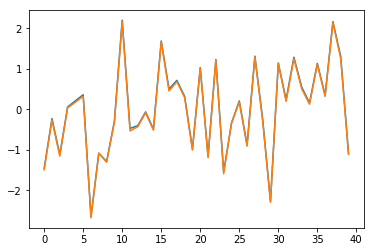

In [55]:
plt.plot(fit.resid()[:40])
plt.plot(Z[:40])

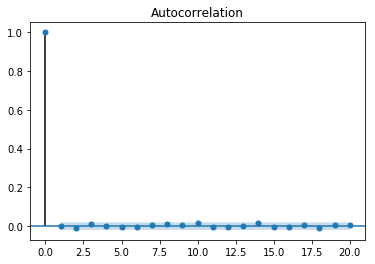

In [56]:
statsmodels.graphics.tsaplots.plot_acf(fit.resid(),lags=20);

Let's now underfit a (1,0,1) with a (0,0,1)

In [57]:
alfas=(0.8,)
betas=(0.5,)
ARMA2=generate_arma(Z,alfas,betas)

generating a ( 1 , 0 , 1 ) process


In [58]:
fit2 = ARIMA((0,0,1)).fit(ARMA2)
fit2.params()

array([-0.20461851,  0.85522565])

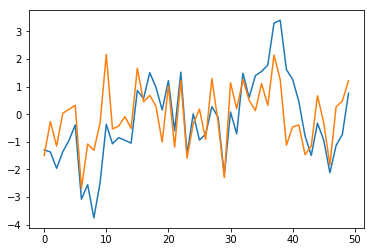

In [59]:
plt.plot(fit2.resid()[:50])
plt.plot(X1[:50,1])

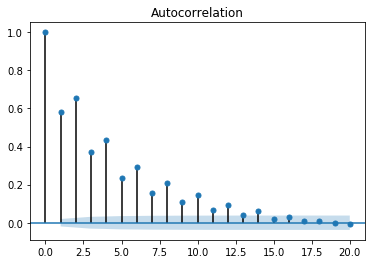

In [60]:
statsmodels.graphics.tsaplots.plot_acf(fit2.resid(),lags=20);

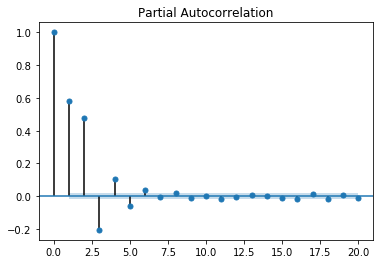

In [61]:
statsmodels.graphics.tsaplots.plot_pacf(fit2.resid(),lags=20);

and with a (1,0,0)

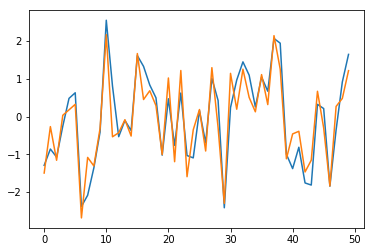

In [62]:
fit2b = ARIMA((1,0,0)).fit(ARMA2)
fit2b.params()
plt.plot(fit2b.resid()[:50])
plt.plot(X1[:50,1])

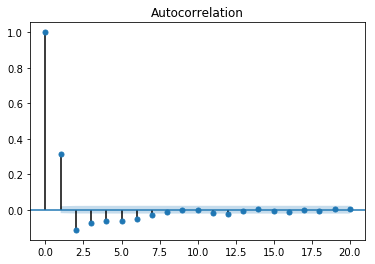

In [63]:
statsmodels.graphics.tsaplots.plot_acf(fit2b.resid(),lags=20);

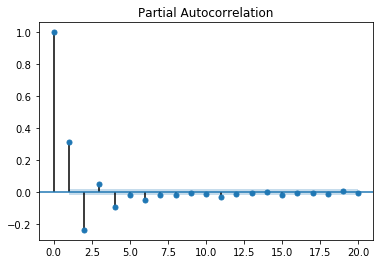

In [64]:
statsmodels.graphics.tsaplots.plot_pacf(fit2b.resid(),lags=20);

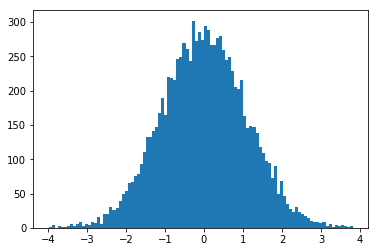

In [65]:
plt.hist(fit2b.resid(),bins=100);

### Forecasts

Exponential smoothing

In [66]:
def predict_exp_smooth(series,alpha=0.1):
    """eq (5.3) chapfield"""
    prediction=np.zeros(len(series))
    for i in range(0,len(series)-1):
        prediction[i+1]=alpha*series[i]+(1-alpha)*prediction[i]
    return prediction

def error_pes(alpha,series):
    from  sklearn.metrics import mean_squared_error as mse
    return (mse(series,predict_exp_smooth(series,alpha)))

1.1111475060387359

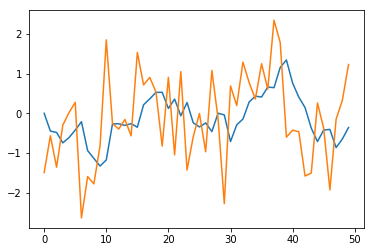

In [67]:
from  sklearn.metrics import mean_squared_error as mse
ARMA1_pes=predict_exp_smooth(ARMA1,0.3)
plt.plot(ARMA1_pes[:50])
plt.plot(ARMA1[:50]);
mse(ARMA1,ARMA1_pes)

In [68]:
series=MA1
print(error_pes(0,series))
print(error_pes(0.1,series))
print(error_pes(0.3,series))
print(error_pes(0.6,series))
print(error_pes(0.9,series))
print(error_pes(1,series))

1.35541512837
1.45265635101
1.71217239284
2.32381402719
3.34424830945
3.82778212534


In [69]:
from scipy.optimize import minimize
print(minimize(error_pes,x0=0.5, args=(AR1),method='Nelder-Mead'))
print(minimize(error_pes,x0=0.1, args=(MA1),method='Nelder-Mead'))
print(minimize(error_pes,x0=0.1, args=(ARMA1),method='Nelder-Mead'))

 final_simplex: (array([[ 0.90244141],
       [ 0.90234375]]), array([ 1.10627399,  1.106274  ]))
           fun: 1.1062739912821355
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([ 0.90244141])
 final_simplex: (array([[ -7.81250000e-05],
       [ -1.56250000e-04]]), array([ 1.35533949,  1.35535446]))
           fun: 1.3553394903444766
       message: 'Optimization terminated successfully.'
          nfev: 32
           nit: 16
        status: 0
       success: True
             x: array([ -7.81250000e-05])
 final_simplex: (array([[ 0.00046875],
       [ 0.00054688]]), array([ 1.04724909,  1.04725218]))
           fun: 1.0472490912417176
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([ 0.00046875])


In [70]:
ARIMA_011=generate_arma(X1[:,2],(),(0.3,),integrate=True)
minimize(error_pes,x0=0.5, args=(ARIMA_011),method='Nelder-Mead')

generating a ( 0 , 1 , 1 ) process


 final_simplex: (array([[ 1.29267578],
       [ 1.29277344]]), array([ 0.99973565,  0.99973565]))
           fun: 0.99973564713294438
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([ 1.29267578])

Using ARIMA

In [71]:
fit_011.predict_in_sample?

Object `fit_011.predict_in_sample` not found.


In [72]:
fit_011 = ARIMA((0,1,1)).fit(ARIMA_011)
predict_ARIMA_011=fit_011.predict_in_sample()
fit_011.params()

array([-0.00283123,  0.29276372])

In [73]:
fit_011b = auto_arima(ARIMA_011, start_p=0, start_q=0, max_p=2, max_q=2,
                          seasonal=False, d=1,  trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=False)  # set to stepwise

Fit ARIMA: order=(0, 1, 0); AIC=29167.555, BIC=29181.975, Fit time=0.056 seconds
Fit ARIMA: order=(0, 1, 1); AIC=28379.825, BIC=28401.455, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 2); AIC=28377.626, BIC=28406.467, Fit time=0.851 seconds
Fit ARIMA: order=(1, 1, 0); AIC=28471.994, BIC=28493.625, Fit time=0.270 seconds
Fit ARIMA: order=(1, 1, 1); AIC=28377.578, BIC=28406.419, Fit time=6.955 seconds
Fit ARIMA: order=(1, 1, 2); AIC=28379.567, BIC=28415.618, Fit time=10.135 seconds
Fit ARIMA: order=(2, 1, 0); AIC=28390.177, BIC=28419.018, Fit time=0.860 seconds
Fit ARIMA: order=(2, 1, 1); AIC=28379.568, BIC=28415.619, Fit time=9.809 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 37.798 seconds


In [74]:
in_sample_preds = fit_011b.predict_in_sample()
mse(-ARIMA_011[1:],predict_ARIMA_011)

950.16128516947015

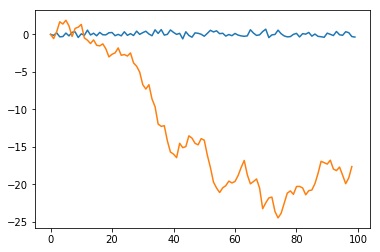

In [75]:
plt.plot(predict_ARIMA_011[:100])
plt.plot(-ARIMA_011[1:100])

In [76]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [77]:
show(plot_arima(ARIMA_011, in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Spectrum
FT of the covariance/correlation function

In [78]:
from scipy.signal import periodogram

In [79]:
def sdf_ar(x,alpha):
    return 1/np.pi/(1-2*alpha*np.cos(2*np.pi*x)+alpha**2)
sdf_ar=np.vectorize(sdf_ar)

def sdf_ma(x,beta):
    return 1/np.pi*(1+2*beta*np.cos(2*np.pi*x)/(1+beta**2))
sdf_ma=np.vectorize(sdf_ma)

Raw

generating a ( 1 , 0 , 0 ) process


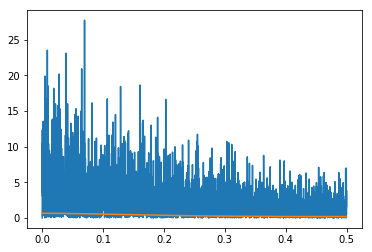

In [80]:
alpha=0.3
AR=generate_arma(X1[:,2],(alpha,),(),integrate=False)
f, Pxx_den= periodogram(AR)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,alpha))

With window

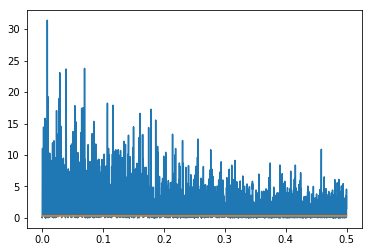

In [81]:
from scipy.signal import get_window
#don't know how to use window
f, Pxx_den= periodogram(AR, window=get_window('hann', len(AR)))
#f, Pxx_den= periodogram(AR, window=get_window(('kaiser', 700.0), len(AR)))
#f, Pxx_den= periodogram(AR)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,beta))

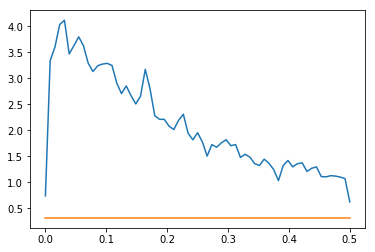

In [82]:
from scipy.signal import welch
f,Pxx_den= welch(AR,nperseg=128)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,beta))

generating a ( 0 , 0 , 1 ) process


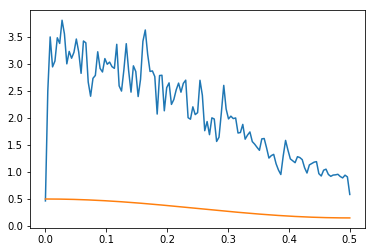

In [83]:
beta=0.3
MA=generate_arma(X1[:,2],(),(beta,),integrate=False)
f,Pxx_den= welch(MA)
#f, Pxx_den= periodogram(MA)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ma(f,beta))

In [84]:
#from scipy.fftpack import fft, ifft
#plt.plot(np.abs(fft(MA))**2)

## Bivariate case

In [85]:
MA1=generate_arma(X1[:,2],(),(0.5,),integrate=False)
MA2=generate_arma(X1[:,3],(),(0.5,),integrate=False)

generating a ( 0 , 0 , 1 ) process
generating a ( 0 , 0 , 1 ) process


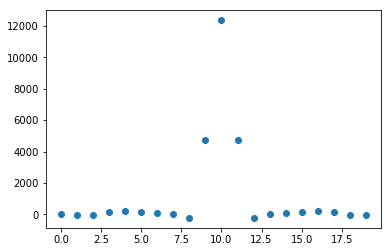

In [86]:
from scipy.signal import correlate
plt.plot(correlate(MA1, MA1, mode='same')[int(len(MA1)/2)-10:int(len(MA1)/2)+10],'o')

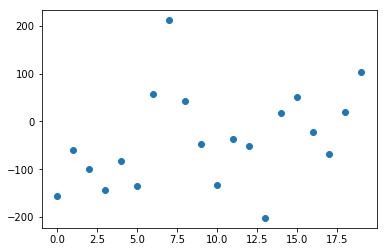

In [87]:
plt.plot(correlate(MA1, MA2, mode='same')[int(len(MA1)/2)-10:int(len(MA1)/2)+10],'o')

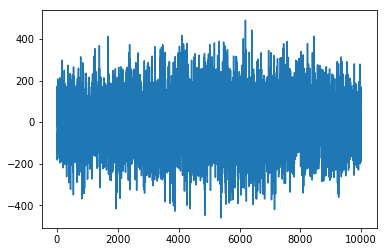

In [88]:
plt.plot(np.correlate(MA1, MA2, mode='same'))

If series are not whitened, one gets spurious correlations

generating a ( 0 , 0 , 1 ) process
generating a ( 0 , 1 , 1 ) process


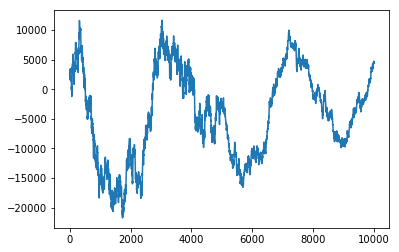

In [89]:
MA1=generate_arma(X1[:,2],(),(0.5,),integrate=False)
MA2=generate_arma(X1[:,3],(),(0.5,),integrate=True)
plt.plot(np.correlate(MA1, MA2, mode='same'))

### Spectrum

generating a ( 0 , 1 , 1 ) process
generating a ( 0 , 1 , 1 ) process


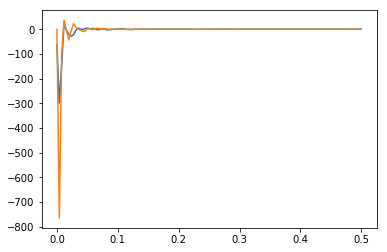

In [90]:
MA1=generate_arma(X1[:,2],(),(0.5,),integrate=True)
MA2=generate_arma(X1[:,3],(),(0.5,),integrate=True)
from scipy.signal import csd
f,s=csd(MA1,MA2)
plt.plot(f,s.real)
plt.plot(f,-s.imag)

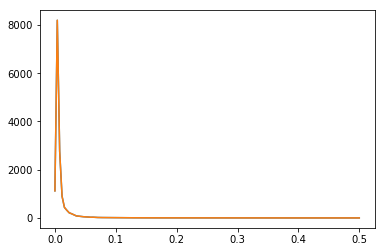

In [91]:
f,s=welch(MA1)
f2,s2=csd(MA1,MA1)
plt.plot(f,s)
plt.plot(f2,s2.real)

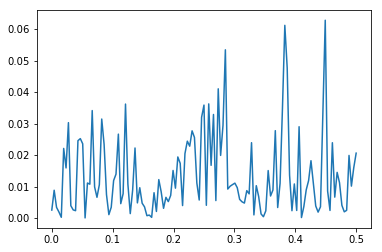

In [92]:
from scipy.signal import coherence
f,s=coherence(MA1,MA2)
plt.plot(f,s)

In [93]:
import scipy.signal

## Kalman Filter

## Bayesian DLM

In [94]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


def tsplot(y, lags=30, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [101]:
X1[:,0]

array([ 0.37612128,  0.53413703, -1.03330864, ..., -0.11225226,
        0.72832075, -0.26858346])

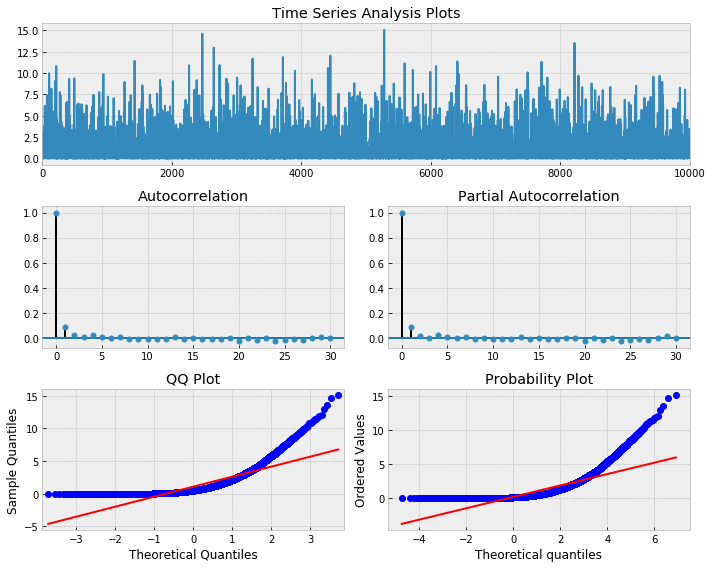

In [104]:
tsplot(AR**2)